In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima.model_selection import train_test_split
import tensorflow as tf


# Análisis de los datos

In [32]:
billing = pd.read_csv("data/historic_data/historico_facturacion.csv", sep=";")

/tmp/ipykernel_166241/2714867713.py:1: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  billing = pd.read_csv("data/historic_data/historico_facturacion.csv", sep=";")


In [5]:
billing

,BU_Name_CO,FirstDayOfMonth,Sales_Office_Name,Target_Market_Name,Application_Field,SubApplication_Field,Product_Hierarchy,Suma de Gross_Sales_LC,Suma de QTY,Material,Customer,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Building Main Contractors,01/01/2020,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"1,435.47",660.0,S2,C8,NaN,NaN,NaN,NaN,NaN
1,Building Main Contractors,01/02/2020,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"1,370.22",630.0,S2,C8,NaN,NaN,NaN,NaN,NaN
2,Building Main Contractors,01/03/2020,Bogota,Building Finishing,21840.0,2184010.0,2.184010e+16,13.05,6.0,S2,C8,NaN,NaN,NaN,NaN,NaN
3,Building Main Contractors,01/03/2020,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"2,283.71",1050.0,S2,C8,NaN,NaN,NaN,NaN,NaN
4,Building Main Contractors,01/05/2020,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"2,707.83",1245.0,S2,C8,NaN,Lluvia,Historio,Historio,Merged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885434,NaN,01/09/2020,Medelli­n,Flooring,20811.0,2081102.0,2.081102e+16,-,0.0,S1196,C571,NaN,NaN,NaN,NaN,NaN
885435,NaN,01/09/2020,Medelli­n,Flooring,20611.0,2061102.0,2.061102e+16,-,0.0,S3160,C571,NaN,NaN,NaN,NaN,NaN
885436,NaN,01/09/2020,Medelli­n,Flooring,20611.0,2061102.0,2.061102e+16,-,0.0,S3163,C571,NaN,NaN,NaN,NaN,NaN
885437,NaN,01/09/2020,Medelli­n,Flooring,20815.0,2081501.0,2.081501e+16,-,0.0,S4206,C571,NaN,NaN,NaN,NaN,NaN


In [15]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885439 entries, 0 to 885438
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BU_Name_CO              885423 non-null  object 
 1   FirstDayOfMonth         885439 non-null  object 
 2   Sales_Office_Name       627397 non-null  object 
 3   Target_Market_Name      885251 non-null  object 
 4   Application_Field       885251 non-null  float64
 5   SubApplication_Field    885251 non-null  float64
 6   Product_Hierarchy       885251 non-null  float64
 7   Suma de Gross_Sales_LC  885439 non-null  object 
 8   Suma de QTY             885439 non-null  float64
 9   Material                885439 non-null  object 
 10  Customer                885439 non-null  object 
 11  Unnamed: 11             0 non-null       float64
 12  Unnamed: 12             2 non-null       object 
 13  Unnamed: 13             2 non-null       object 
 14  Unnamed: 14         

In [62]:
billing

,BU_Name_CO,Sales_Office_Name,Target_Market_Name,Application_Field,SubApplication_Field,Product_Hierarchy,Suma de Gross_Sales_LC,Suma de QTY,Material,Customer,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
FirstDayOfMonth,,,,,,,,,,,,,,,
2020-01-01,Building Main Contractors,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"1,435.47",660.0,S2,C8,NaN,NaN,NaN,NaN,NaN
2020-02-01,Building Main Contractors,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"1,370.22",630.0,S2,C8,NaN,NaN,NaN,NaN,NaN
2020-03-01,Building Main Contractors,Bogota,Building Finishing,21840.0,2184010.0,2.184010e+16,13.05,6.0,S2,C8,NaN,NaN,NaN,NaN,NaN
2020-03-01,Building Main Contractors,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"2,283.71",1050.0,S2,C8,NaN,NaN,NaN,NaN,NaN
2020-05-01,Building Main Contractors,Medelli­n,Building Finishing,21840.0,2184010.0,2.184010e+16,"2,707.83",1245.0,S2,C8,NaN,Lluvia,Historio,Historio,Merged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,NaN,Medelli­n,Flooring,20811.0,2081102.0,2.081102e+16,-,0.0,S1196,C571,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,Medelli­n,Flooring,20611.0,2061102.0,2.061102e+16,-,0.0,S3160,C571,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,Medelli­n,Flooring,20611.0,2061102.0,2.061102e+16,-,0.0,S3163,C571,NaN,NaN,NaN,NaN,NaN


In [8]:
billing["Sales_Office_Name"].value_counts()

Sales_Office_Name
Bogota          130269
Barranquilla    111660
Cali             99752
Oriente          87083
Santander        73980
Medelli­n        73199
Pereira          51454
Name: count, dtype: int64

In [8]:
billing["Target_Market_Name"].value_counts()

Target_Market_Name
Eng. Refurbishment     117403
Flooring               117304
Building Finishing     115329
Sealing & Bonding      110951
Construction Others    102233
Roofing                102028
Waterproofing           98439
Concrete                84172
Industry                37372
Industrial Coating         20
Name: count, dtype: int64

In [33]:
billing_concrete_bogota = billing[(billing["Sales_Office_Name"] == "Bogota") & (billing["Target_Market_Name"] == "Concrete")]
billing_concrete_cali = billing[(billing["Sales_Office_Name"] == "Cali") & (billing["Target_Market_Name"] == "Concrete")]
billing_concrete_oriente = billing[(billing["Sales_Office_Name"] == "Oriente") & (billing["Target_Market_Name"] == "Concrete")]
billing_concrete_barranquilla = billing[(billing["Sales_Office_Name"] == "Barranquilla") & (billing["Target_Market_Name"] == "Concrete")]


In [35]:
billing_concrete_bogota

,BU_Name_CO,FirstDayOfMonth,Sales_Office_Name,Target_Market_Name,Application_Field,SubApplication_Field,Product_Hierarchy,Suma de Gross_Sales_LC,Suma de QTY,Material,Customer,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
589,Building Main Contractors,01/09/2023,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,68.32,6.0,S4162,C8,NaN,NaN,NaN,NaN,NaN
590,Building Main Contractors,01/02/2024,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,-,3.0,S4162,C8,NaN,NaN,NaN,NaN,NaN
592,Building Main Contractors,01/03/2020,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,128.49,3.0,S4163,C8,NaN,NaN,NaN,NaN,NaN
593,Building Main Contractors,01/06/2020,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,385.46,9.0,S4163,C8,NaN,NaN,NaN,NaN,NaN
594,Building Main Contractors,01/09/2020,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,415.16,9.0,S4163,C8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884064,Specialized Distributors,01/04/2022,Bogota,Concrete,21405.0,2140506.0,2.140506e+16,78.04,36.0,S3013,C1645,NaN,NaN,NaN,NaN,NaN
885105,Specialized Distributors,01/10/2022,Bogota,Concrete,21403.0,2140301.0,2.140301e+16,17.37,6.0,S2825,C1751,NaN,NaN,NaN,NaN,NaN
885111,Specialized Distributors,01/09/2022,Bogota,Concrete,21403.0,2140301.0,2.140301e+16,277.53,12.0,S4114,C1751,NaN,NaN,NaN,NaN,NaN
885112,Specialized Distributors,01/10/2022,Bogota,Concrete,21403.0,2140301.0,2.140301e+16,138.76,6.0,S4114,C1751,NaN,NaN,NaN,NaN,NaN


In [12]:
billing_concrete_bogota

,BU_Name_CO,FirstDayOfMonth,Sales_Office_Name,Target_Market_Name,Application_Field,SubApplication_Field,Product_Hierarchy,Suma de Gross_Sales_LC,Suma de QTY,Material,Customer,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
589,Building Main Contractors,01/09/2023,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,68.32,6.0,S4162,C8,NaN,NaN,NaN,NaN,NaN
590,Building Main Contractors,01/02/2024,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,-,3.0,S4162,C8,NaN,NaN,NaN,NaN,NaN
592,Building Main Contractors,01/03/2020,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,128.49,3.0,S4163,C8,NaN,NaN,NaN,NaN,NaN
593,Building Main Contractors,01/06/2020,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,385.46,9.0,S4163,C8,NaN,NaN,NaN,NaN,NaN
594,Building Main Contractors,01/09/2020,Bogota,Concrete,21405.0,2140503.0,2.140503e+16,415.16,9.0,S4163,C8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884064,Specialized Distributors,01/04/2022,Bogota,Concrete,21405.0,2140506.0,2.140506e+16,78.04,36.0,S3013,C1645,NaN,NaN,NaN,NaN,NaN
885105,Specialized Distributors,01/10/2022,Bogota,Concrete,21403.0,2140301.0,2.140301e+16,17.37,6.0,S2825,C1751,NaN,NaN,NaN,NaN,NaN
885111,Specialized Distributors,01/09/2022,Bogota,Concrete,21403.0,2140301.0,2.140301e+16,277.53,12.0,S4114,C1751,NaN,NaN,NaN,NaN,NaN
885112,Specialized Distributors,01/10/2022,Bogota,Concrete,21403.0,2140301.0,2.140301e+16,138.76,6.0,S4114,C1751,NaN,NaN,NaN,NaN,NaN


In [13]:
billing_concrete_bogota["Material"].value_counts()

Material
S4119    615
S4162    514
S4120    510
S4113    479
S4114    412
        ... 
S2984      1
S3358      1
S3894      1
S3862      1
S2912      1
Name: count, Length: 233, dtype: int64

# Genarar top cinco de ventas por regional

In [6]:
billing_concrete_bogota.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5)

Material
S3019    7420068.0
S276     4493490.0
S3507    3922260.0
S681     3874116.0
S732     2642415.0
Name: Suma de QTY, dtype: float64

In [15]:
billing_concrete_cali.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5)

Material
S477     7783827.0
S276     6693474.0
S846     1278570.0
S4141     938004.0
S3499     806100.0
Name: Suma de QTY, dtype: float64

In [16]:
billing_concrete_barranquilla.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5)

Material
S2931    7929921.0
S3606    6584268.0
S3604    6549330.0
S2041    4654590.0
S3661    3608115.0
Name: Suma de QTY, dtype: float64

In [17]:
billing_concrete_oriente.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5)

Material
S3624    6569550.0
S791     3924300.0
S719     1923600.0
S3534    1783140.0
S276     1479945.0
Name: Suma de QTY, dtype: float64

In [ ]:
billing_concrete_bogota.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5)


In [ ]:
billing_concrete_bogota.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5)


In [93]:
billing_concrete_bogota[billing_concrete_bogota["Material"] == "S3019"]

,BU_Name_CO,FirstDayOfMonth,Sales_Office_Name,Target_Market_Name,Application_Field,SubApplication_Field,Product_Hierarchy,Suma de Gross_Sales_LC,Suma de QTY,Material,Customer,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
date,,,,,,,,,,,,,,,,
2020-03-01,Concrete,01/03/2020,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"5,107.20",12000.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2020-11-01,Concrete,01/11/2020,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"3,319.68",7800.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2020-12-01,Concrete,01/12/2020,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"11,491.20",27000.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2021-01-01,Concrete,01/01/2021,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"31,281.60",73500.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2021-02-01,Concrete,01/02/2021,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"31,766.78",74640.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2021-03-01,Concrete,01/03/2021,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"59,371.20",139500.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2021-04-01,Concrete,01/04/2021,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"41,496.00",97500.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2021-05-01,Concrete,01/05/2021,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"30,643.20",72000.0,S3019,C77,NaN,NaN,NaN,NaN,NaN
2021-06-01,Concrete,01/06/2021,Bogota,Concrete,21301.0,2130101.0,2.130101e+16,"42,134.40",99000.0,S3019,C77,NaN,NaN,NaN,NaN,NaN


# Data Engineering

In [5]:
def generate_time_series(df: pd.DataFrame, sku: str, series: str):
    df = df[df["Material"] == sku]

    df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")

    df.sort_index(inplace=True)

    df.set_index("date", inplace=True)
    
    time_series_sku = df[series]

    return time_series_sku

In [664]:
time_series_bogota_S3019 = generate_time_series(billing_concrete_bogota, "S3019", "Suma de QTY")
time_series_bogota_S276 = generate_time_series(billing_concrete_bogota, "S276", "Suma de QTY")

/tmp/ipykernel_60714/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_60714/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")


In [91]:
time_series_bogota_S3019

date
2020-01-01     21.0
2020-01-01      0.0
2020-01-01      0.0
2020-01-01      0.0
2020-01-01      0.0
              ...  
2024-07-01    144.0
2024-07-01    162.0
2024-07-01     36.0
2024-07-01      6.0
2024-07-01      3.0
Name: Suma de QTY, Length: 9296, dtype: float64

# Análisis de series de tiempo

<Axes: xlabel='date'>

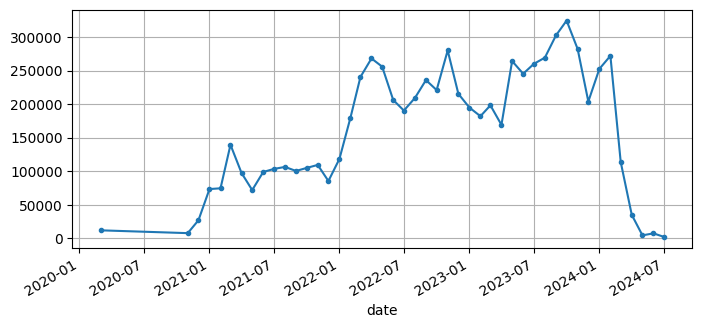

In [96]:
time_series_bogota_S3019.plot(grid=True, marker=".", figsize=(8, 3.5))

<Axes: xlabel='date'>

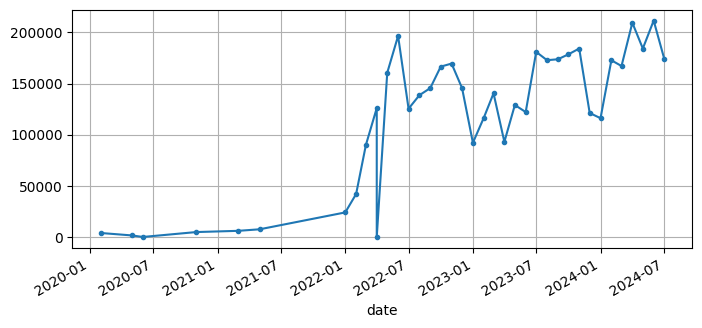

In [98]:

time_series_bogota_S276.plot(grid=True, marker=".", figsize=(8, 3.5))

<Axes: xlabel='date'>

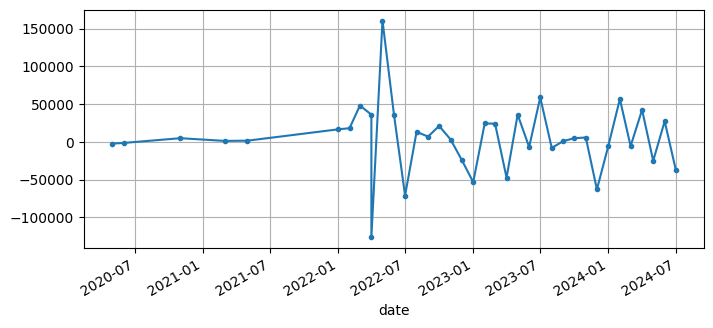

In [118]:
time_series_bogota_S276.diff().plot(grid=True, marker=".", figsize=(8, 3.5))

In [108]:
time_series_bogota_S276_monthly = time_series_bogota_S276.resample('M').mean()
time_series_bogota_S3019_monthly = time_series_bogota_S3019.resample('M').mean()


/tmp/ipykernel_60714/4060004682.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_bogota_S276_monthly = time_series_bogota_S276.resample('M').mean()
/tmp/ipykernel_60714/4060004682.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_bogota_S3019_monthly = time_series_bogota_S3019.resample('M').mean()


In [109]:
time_series_bogota_S276_rolling_3_m = time_series_bogota_S276_monthly.rolling(window=12).mean()
time_series_bogota_S3019_rolling_3_m = time_series_bogota_S276_monthly.rolling(window=12).mean()


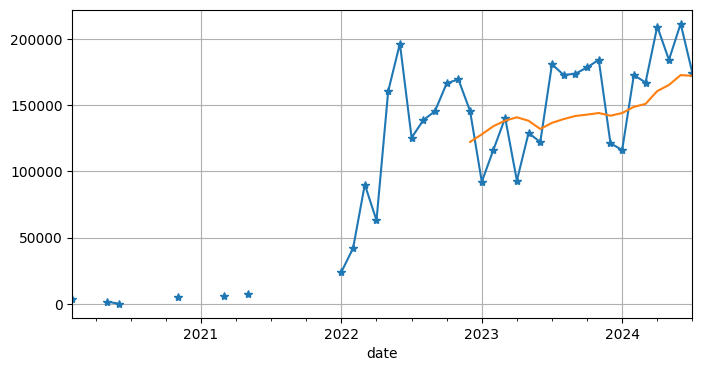

In [111]:
fig, ax = plt.subplots(figsize=(8, 4))
time_series_bogota_S276_monthly.plot(ax=ax, marker="*")
time_series_bogota_S276_rolling_3_m.plot(ax=ax, grid=True, legend=False)
plt.show()

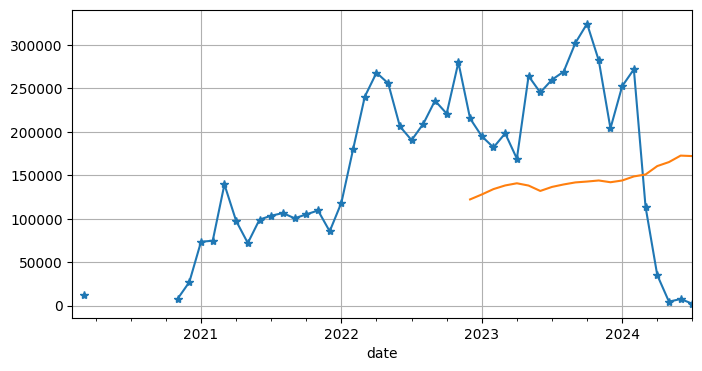

In [112]:
fig, ax = plt.subplots(figsize=(8, 4))
time_series_bogota_S3019_monthly.plot(ax=ax, marker="*")
time_series_bogota_S3019_rolling_3_m.plot(ax=ax, grid=True, legend=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller 

""" 
    Pasa una serie temporal y un título opcional, devuelve un informe ADF 
""" 

def  adf_test ( series,title= '' ): 
    print ( f'Prueba de Dickey-Fuller aumentada: {title} ' ) 
    result = adfuller(series.dropna(),autolag= 'AIC' ) 
    labels = [ 'Estadística de prueba ADF' , 'valor p' , '# rezagos utilizados' , '# observaciones' ] 
    out = pd.Series(result[ 0 : 4 ],index=labels) 
    for key,val in result[ 4 ].items(): 
        out[ f'valor crítico ( {key} )' ]=val 
    print (out.to_string()) 
    if result[ 1 ] <= 0.05 :
        print ( "Evidencia fuerte contra la hipótesis nula" ) 
        print ( "Rechazar la hipótesis nula" ) 
        print ( "Los datos no tienen raíz unitaria y son estacionarios" ) 

        return True
    else:
        print ( "Evidencia débil contra la hipótesis nula" ) 
        print ( "No se puede rechazar la hipótesis nula" ) 
        print ( "Los datos tienen raíz unitaria y no son estacionarios" )

        return False


In [117]:
adf_test(time_series_bogota_S3019.diff())

Prueba de Dickey-Fuller aumentada:  
Estadística de prueba ADF   -5.790944e+00
valor p                      4.874056e-07
# rezagos utilizados         0.000000e+00
# observaciones              4.400000e+01
valor crítico ( 1% )        -3.588573e+00
valor crítico ( 5% )        -2.929886e+00
valor crítico ( 10% )       -2.603185e+00
Evidencia fuerte contra la hipótesis nula
Rechazar la hipótesis nula
Los datos no tienen raíz unitaria y son estacionarios


In [677]:
y = time_series_bogota_S276.diff()[1:]

#y = time_series_bogota_S276

#y = pm.datasets.load_sunspots()

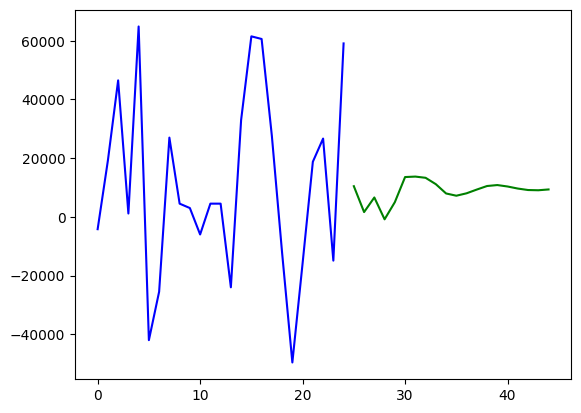

In [ ]:
x = np.arange(y.shape[0])

plt.plot(x[:train_size], train, c='blue')
plt.plot(x[train_size:], predicciones_rf, c='green')
plt.show()

Text(0.5, 1.0, 'Test samples vs. forecasts (m=1)')

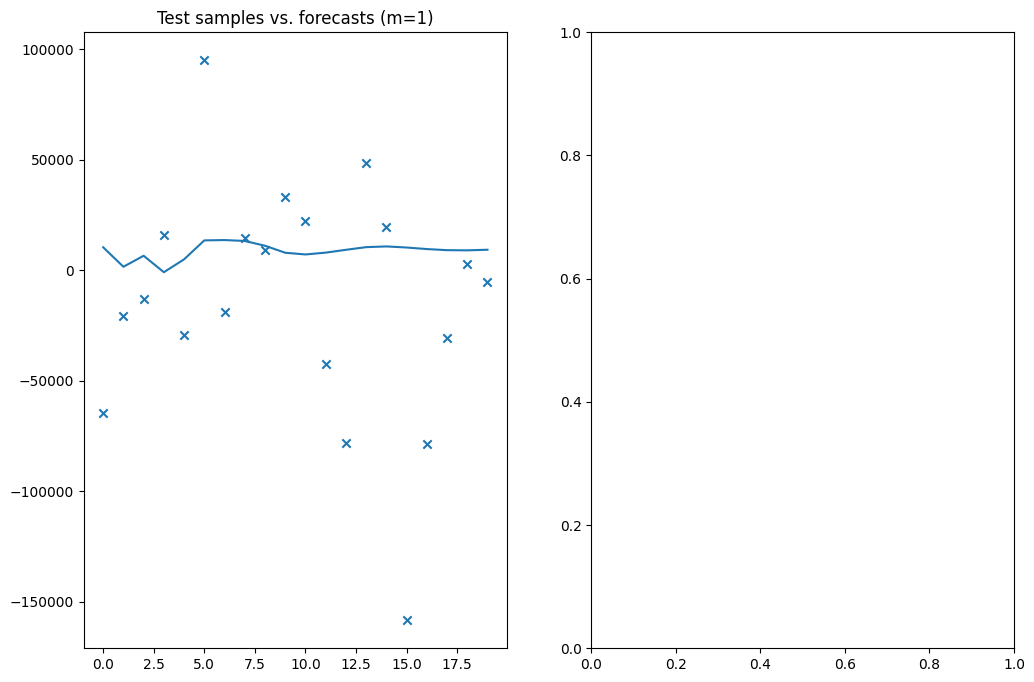

In [339]:

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(test.shape[0])

# Plot m=1
axes[0].scatter(x, test, marker='x')
axes[0].plot(x, forecast)
axes[0].set_title('Test samples vs. forecasts (m=1)')

In [297]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

model = SARIMAX(train, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12))
resultado = model.fit()

/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75754D+00    |proj g|=  1.62843D-01

At iterate    5    f=  5.66744D+00    |proj g|=  4.08229D-02

At iterate   10    f=  5.64048D+00    |proj g|=  1.05339D-02

At iterate   15    f=  5.64017D+00    |proj g|=  3.11086D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   8.786D-06   5.640D+00
  F =   5.6401721935650242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [333]:
modelo = ARIMA(train, order=(5, 1, 1))
resultado = modelo.fit()

/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


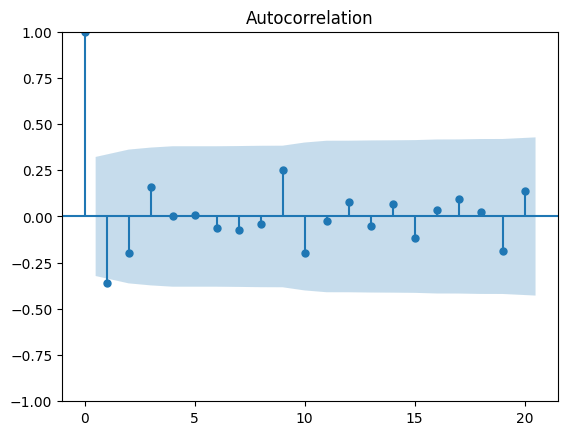

In [671]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que 'serie' es tu serie de tiempo
plot_acf(y, lags=20)
plt.show()

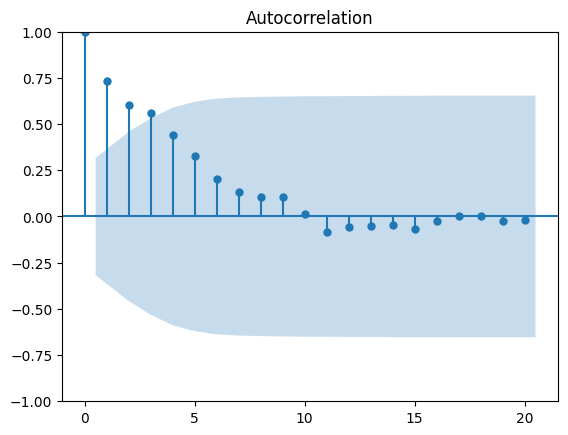

In [675]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que 'serie' es tu serie de tiempo
plot_acf(y, lags=20)
plt.show()

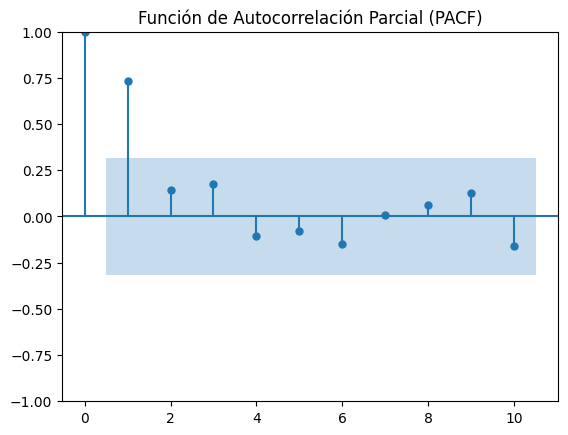

In [676]:
plot_pacf(y, lags=10, method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()

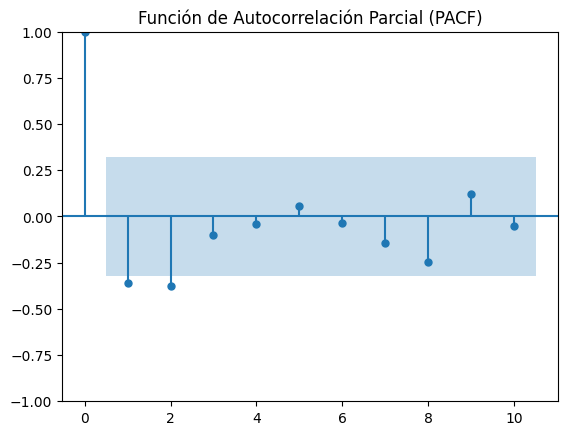

In [678]:
plot_pacf(y, lags=10, method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()

In [520]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as train_test_split_skelarn

def generate_random_forest_model(time_series):
    # Preparar datos para un modelo de Random Forest
    X = time_series.shift(1).dropna()  # Usar el valor de la serie anterior para predecir el siguiente
    y = time_series[1:]  # El valor actual de la serie es el objetivo
    X_train, X_test, y_train, y_test = train_test_split_skelarn(X, y, test_size=0.2, shuffle=False)

    # Ajustar el modelo
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(X_train.values.reshape(-1, 1), y_train)

    # Predicciones
    predicciones_rf = rf_model.predict(X_test.values.reshape(-1, 1))
    print("predicciones Random Forest: {predicciones_rf}")

    return rf_model, predicciones_rf, y_test

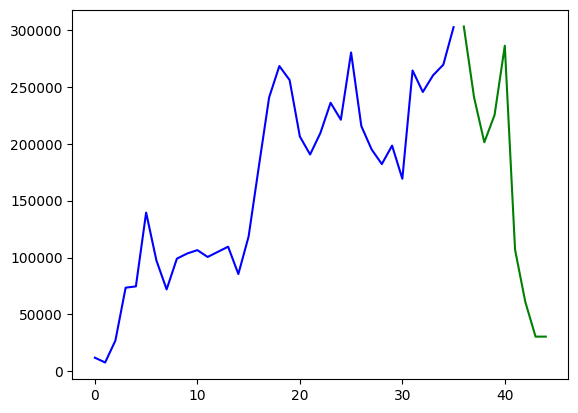

In [362]:
x = np.arange(36+9)

plt.plot(x[:train_size], X_train, c='blue')
plt.plot(x[train_size:], predicciones_rf, c='green')
plt.show()

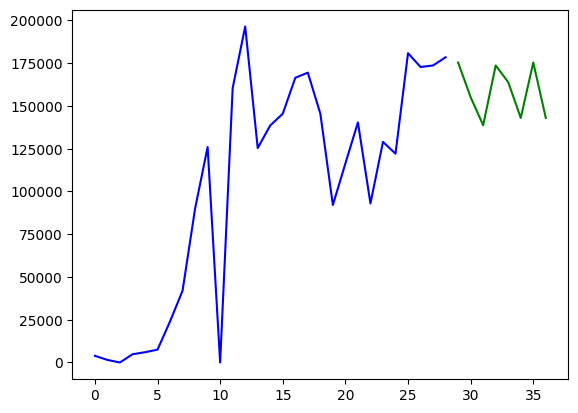

In [373]:
train_size = 29

x = np.arange(29+8)

plt.plot(x[:train_size], X_train, c='blue')
plt.plot(x[train_size:], predicciones_rf, c='green')
plt.show()

Text(0.5, 1.0, 'Test samples vs. forecasts (m=1)')

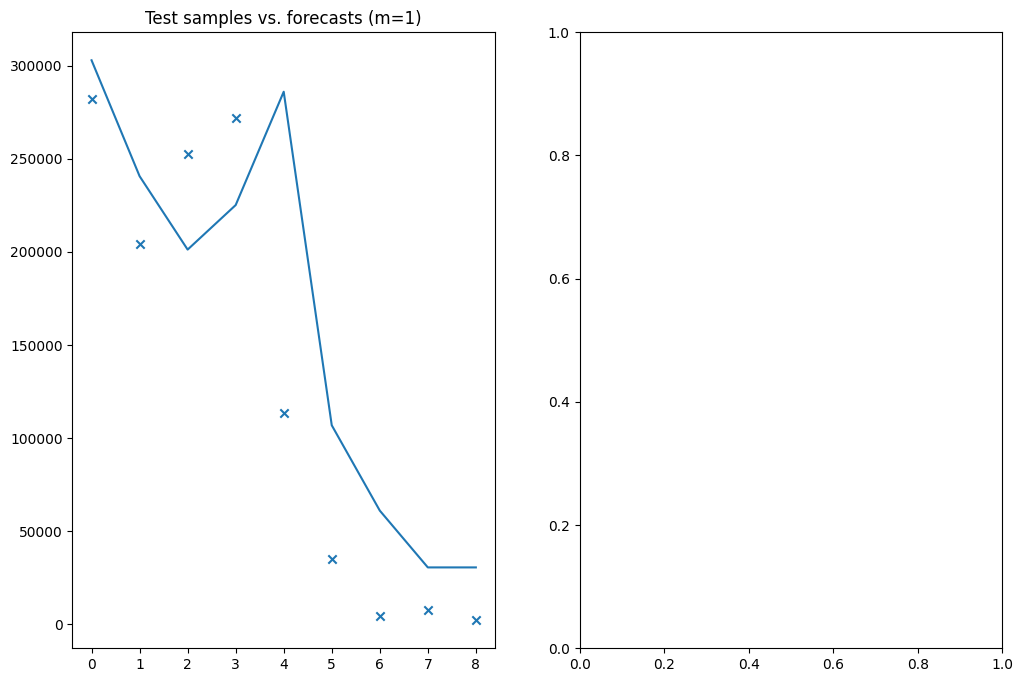

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(X_test.shape[0])

# Plot m=1
axes[0].scatter(x, y_test, marker='x')
axes[0].plot(x, predicciones_rf)
axes[0].set_title('Test samples vs. forecasts (m=1)')

Text(0.5, 1.0, 'Test samples vs. forecasts (m=1)')

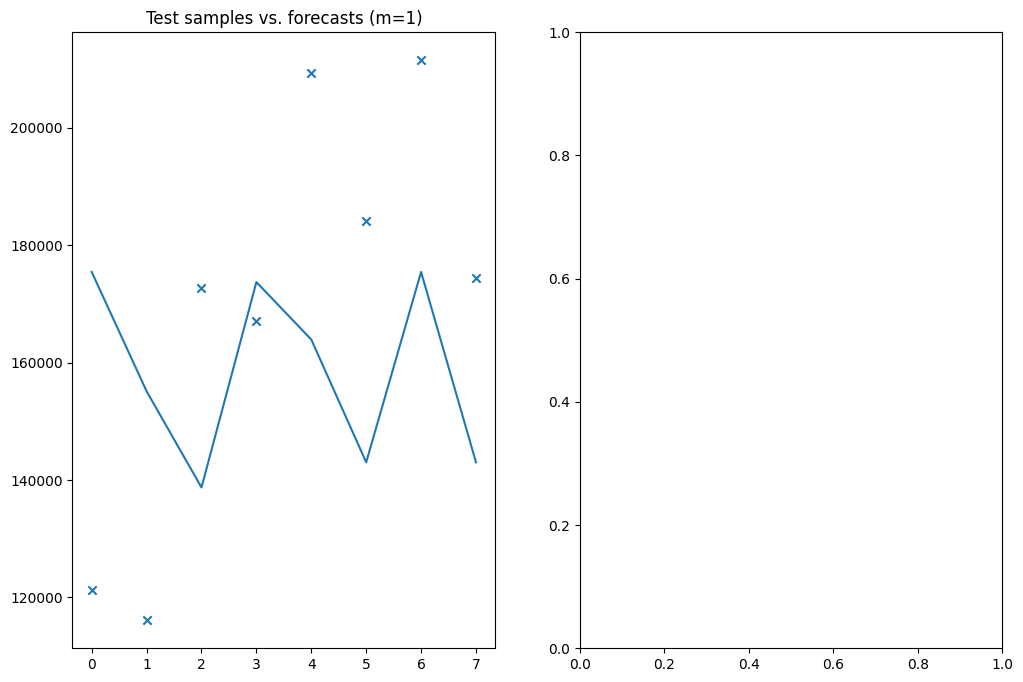

In [374]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(X_test.shape[0])

# Plot m=1
axes[0].scatter(x, y_test, marker='x')
axes[0].plot(x, predicciones_rf)
axes[0].set_title('Test samples vs. forecasts (m=1)')

In [383]:
from statsmodels.tsa.stattools import acf, pacf

# Calcula los valores de ACF y PACF
valores_acf = acf(serie_diferenciada, fft=True, nlags=10)  # Hasta 20 rezagos
valores_pacf = pacf(serie_diferenciada, nlags=10, method="ywm")  # Hasta 20 rezagos

# Definir un umbral para significancia (por ejemplo, 0.2)
umbral = 0.25

# Condición para evaluar si hay autocorrelaciones significativas
if any(abs(valor) > umbral for valor in valores_acf[1:]):  # Excluye el lag 0
    print("La serie presenta autocorrelación significativa.")
    # Realiza acciones específicas aquí
else:
    print("La serie NO presenta autocorrelación significativa.")
    # Realiza acciones alternativas aquí

La serie presenta autocorrelación significativa.


In [31]:
def ljung_box_test(tiee_series):
    # Prueba de Ljung-Box
    ljung_box_result = acorr_ljungbox(y.diff().dropna(), lags=[10], return_df=True)
    print("Prueba de Ljung-Box:")
    print(ljung_box_result)
    if ljung_box_result >= 0.05:
        return False
    else:
        return True

In [468]:
def calculate_acf_pacf(time_series: pd.Series):
    # Calcula los valores de ACF y PACF
    valores_acf = acf(time_series, fft=True, nlags=10)  # Hasta 20 rezagos
    valores_pacf = pacf(time_series, nlags=10, method="ywm")  # Hasta 20 rezagos

    # Definir un umbral para significancia (por ejemplo, 0.2)
    umbral = 0.25

    # Condición para evaluar si hay autocorrelaciones significativas
    if any(abs(valor) > umbral for valor in valores_acf[1:]):  # Excluye el lag 0
        print("La serie presenta autocorrelación significativa.")
        
        return True
    else:
        print("La serie NO presenta autocorrelación significativa.")
        
        return False

In [591]:
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"RMSE is: {rmse}")
    print(f"MAE is: {mae}")
    print(f"MAPE is: {mape}")

    metrics = {"mae": mae, "rmse":rmse, "mape":mape}

    return metrics

In [ ]:
def generate_rnn_lstm_model(train, test):
    max_value = train.max()
    train = train / max_value
    test = test / max_value

    seq_length = round(len(test) / 2)
    seq_length = 8

    train_ds = tf.keras.utils.timeseries_dataset_from_array(
        train.to_numpy(),targets=train[seq_length:],
        sequence_length=seq_length,
        batch_size=2,
        shuffle=True,
        seed=16
    )
    valid_ds = tf.keras.utils.timeseries_dataset_from_array(
        test.to_numpy(),
        targets=test[seq_length:],
        sequence_length=seq_length,
        batch_size=8
    )

    tf.random.set_seed(42)

    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", mode='min', patience=5, restore_best_weights=True)
    opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
    callbacks=[early_stopping_cb]

    lstm_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)])

    lstm_model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["val_loss"])
    history = model.fit(train_ds, validation_data=valid_ds, epochs=10,
    callbacks=[early_stopping_cb])

    pred_lstm_model = lstm_model.predict(test)
    pred_lstm_model = pred_lstm_model * max_value

    return lstm_model, pred_lstm_model
    

In [48]:
def calculate_model(time_series: pd.Series, sku_name: str):
    models = {}
    if time_series.empty:
        print("time series is empty")
    else:
        time_series.dropna(inplace=True)

        length_time_series = len(time_series)

        if length_time_series > 10:

            train_size = (length_time_series - 4) / length_time_series

            train, test = train_test_split(time_series, train_size=train_size)

            print("----------- SERIE INICIAL --------------")
            print("+++++++++++ Auto Arima Model ++++++++++++++")
            if adf_test(time_series):

                print("*" * 60)

                if calculate_acf_pacf(time_series):
                    arima_model = auto_arima(
                        train, seasonal=False, m=1, trace=True, error_action='ignore', suppress_warnings=True
                    )

                    auto_arima_predict = arima_model.predict(test.shape[0])

                    print(" --- Auto Arima Metrics ---")
                    auto_arima_metrics = calculate_metrics(auto_arima_predict, test)
                    print("-" * 60)

                    models["auto_arima_model"] = {"model": arima_model, "metrics": auto_arima_metrics, "predictions": auto_arima_predict}

                else:
                    # ljung_box_test(time_series)
                    print("Not implemented proof")
            else:        
                print("---------- SERIE DIFERENCIADA -------------")
                time_series_diff = time_series.diff().dropna()

                if adf_test(time_series_diff):
                    if calculate_acf_pacf(time_series_diff):
                        arima_model = auto_arima(
                            time_series_diff, seasonal=False, m=1, trace=True, error_action='ignore', suppress_warnings=True
                        )
            
                        auto_arima_predict = arima_model.predict(test.shape[0])

                        print(" --- Auto Arima Metrics ---")
                        auto_arima_metrics = calculate_metrics(auto_arima_predict, test)
                        print("-" * 60)

                        models["auto_arima_model"] = {"model": arima_model, "metrics": auto_arima_metrics, "predictions": auto_arima_predict}

                else:

                    ljung_box_test(time_series)

            print("+++++++++++ Random Forest Model ++++++++++++++")
            rf_model, rf_model_pred, y_true = generate_random_forest_model(time_series)
            print(" --- Random Forest Metrics ---")
            rf_mode_metrics = calculate_metrics(rf_model_pred, y_true)

            models["random_forest_model"] = {"model": rf_model, "metrics": rf_mode_metrics, "predictions": rf_model_pred}

            print("-" * 60)

            print("+++++++++++ RNN LSTM Model ++++++++++++++")

            lstm_model, pred_lstm_model = generate_rnn_lstm_model(train, test)
            
            print(" --- RNN LSTM Model Metrics ---")
            lstm_model_metrics = calculate_metrics(pred_lstm_model, test)
            print("-" * 60)

            models["rnn_lstm_model"] = {"model": lstm_model, "metrics": lstm_model_metrics, "predictions": pred_lstm_model}

        else:
            print("There is no enough data")

    return models


In [624]:
models_s276 = calculate_model(y, "S276")

----------- SERIE INICIAL --------------
+++++++++++ Auto Arima Model ++++++++++++++
Prueba de Dickey-Fuller aumentada:  
Estadística de prueba ADF    -2.898004
valor p                       0.045581
# rezagos utilizados          0.000000
# observaciones              34.000000
valor crítico ( 1% )         -3.639224
valor crítico ( 5% )         -2.951230
valor crítico ( 10% )        -2.614447
Evidencia fuerte contra la hipótesis nula
Rechazar la hipótesis nula
Los datos no tienen raíz unitaria y son estacionarios
************************************************************
La serie presenta autocorrelación significativa.
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=736.670, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=734.942, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=732.747, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=735.055, Time=0.01 sec
 ARIMA(1

/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


predicciones Random Forest: {predicciones_rf}
 --- Random Forest Metrics ---
RMSE is: 46554.69546366173
MAE is: 41914.28571428572
MAPE is: 0.2892779982912855
------------------------------------------------------------
+++++++++++ RNN LSTM Model ++++++++++++++
Epoch 1/100


/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41810.0586 - mae: 41810.5586
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41832.3242 - mae: 41832.8242
Epoch 3/100
 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34376.0938 - mae: 38326.1875 

/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/home/emil/anaconda3/envs/ciencia_de_datos/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41841.9922 - mae: 41842.4922
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45082.9961 - mae: 45083.4961
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41909.1172 - mae: 41909.6172
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44607.9023 - mae: 44608.4023
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41393.9219 - mae: 41394.4219
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43801.1328 - mae: 43801.6328
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44259.8086 - mae: 44260.3086
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 46006.5547 - mae: 46007.0547
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 45806.9062 - mae: 45807.4062
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42140.7500 - mae: 42141.2500
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44360.0781 - mae: 44360.5781
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━

In [ ]:
bogota_skus = ["S3019", "S276", "S3507", "S681", "S732"]

bogota_top_5 = {}

for sku in skus:
    bogota_top_5[sku] = generate_time_series(billing_concrete_bogota, sku, "Suma de QTY")

/tmp/ipykernel_60714/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_60714/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_60714/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
skus = billing_concrete_cali.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5).index

cali_top_5 = {}

for sku in skus:

    cali_top_5[sku] = generate_time_series(billing_concrete_cali, sku, "Suma de QTY")

/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [38]:
skus = billing_concrete_barranquilla.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5).index

barranquilla_top_5 = {}

for sku in skus:

    barranquilla_top_5[sku] = generate_time_series(billing_concrete_barranquilla, sku, "Suma de QTY")

/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [39]:
skus = billing_concrete_oriente.groupby("Material")["Suma de QTY"].sum().sort_values(ascending=False).head(5).index

oriente_top_5 = {}

for sku in skus:

    cali_top_5[sku] = generate_time_series(billing_concrete_oriente, sku, "Suma de QTY")

/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["FirstDayOfMonth"], format="%d/%m/%Y")
/tmp/ipykernel_166241/2308914237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [19]:

def generate_final_df(predictions: dict):
    dataframes = []

    sku = list(bogota_top_5.keys())[0]
    serie = list(bogota_top_5.values())[0]


    sku_models = calculate_model(serie, sku)
    try:
        forecast = sku_models["random_forest_model"]["predictions"]

        mae = sku_models["random_forest_model"]["metrics"][mae]
        rmse = sku_models["random_forest_model"]["metrics"][rmse]
        mape = sku_models["random_forest_model"]["metrics"][mape]


        df = pd.DataFrame({
            "sku_cd": [sku for i in range(len(forecast))],
            "forecast_val": forecast,
            "mae_val": [mae for i in range(len(forecast))],
            "rmse_val": [rmse for i in range(len(forecast))],
            "mape_val": [mape for i in range(len(forecast))],


        })

        dataframes.append(df)
    except:
        print("It culd not be process time series")
    
    return dataframes

In [ ]:
dataframes = generate_final_df(bogota_top_5)
df_bogota = pd.concat(dataframes)
df_bogota.reset_index(inplace=True)

In [ ]:
dataframes = generate_final_df(cali_top_5)
df_cali = pd.concat(dataframes)
df_cali.reset_index(inplace=True)

In [ ]:
dataframes = generate_final_df(oriente_top_5)
df_oriente = pd.concat(dataframes)
df_oriente.reset_index(inplace=True)

In [ ]:
dataframes = generate_final_df(barranquilla_top_5)
df_barranquilla = pd.concat(dataframes)
df_barranquilla.reset_index(inplace=True)

In [ ]:
df_bogota.to_csv("data/forecast/bogota.csv")
df_cali.to_csv("data/forecast/bogota.csv")
df_oriente.to_csv("data/forecast/bogota.csv")
df_barranquilla.to_csv("data/forecast/bogota.csv")